In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

## 時系列予測にディープラーニングを使う状況

## さまざまな種類のディープラーニングモデルを調べる

## ディープラーニングを使って予測を行うための準備

In [9]:
url = 'https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/metro_interstate_traffic_volume_preprocessed.csv'
df = pd.read_csv(url, index_col='date_time', parse_dates=True)
print(df.columns)

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume'], dtype='object')


都市圏の州間高速道路交通量データセットの特徴量
| 特徴量 | 説明 |
| ---- | ---- |
| `date_time` | CSTタイムゾーンで記録されたデータの日付と時刻 |
| `temp` | 1時間に記録された平均気温(単位はケルビン) |
| `rain_1h` | 1時間に降った雨の量(単位はミリメートル) |
| `snow_1h` | 1時間に降った雪の量(単位はミリメートル) |
| `clouds_all` | 1時間の雲の量の割合 |
| `traffic_volume` | 1時間に報告された州間高速道路94号線の西行き車線の交通量 |

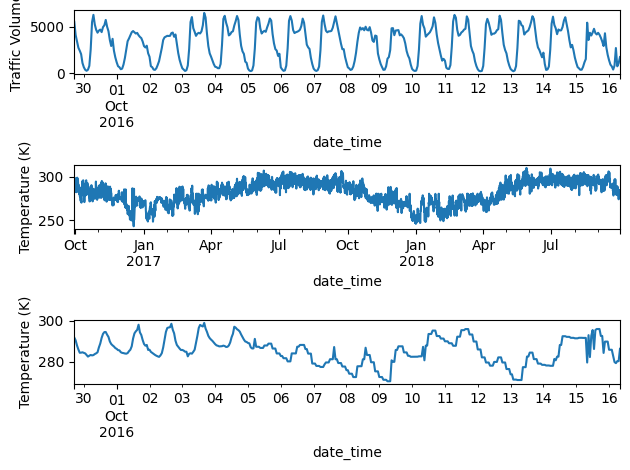

In [21]:
fig, axes = plt.subplots(3, 1)
# traffic volume
df['traffic_volume'].iloc[:400].plot(ax=axes[0])
axes[0].set_ylabel('Traffic Volume')
# temp: yearly
df['temp'].plot(ax=axes[1])
axes[1].set_ylabel('Temperature (K)')
# temp: daily
df['temp'].iloc[:400].plot(ax=axes[2])
axes[2].set_ylabel('Temperature (K)')
plt.tight_layout()

In [28]:
# rain_1h, snow_1hの取る値がほとんどゼロであることがわかる
# これは特徴量として効かないので落とす
display(df.describe().transpose())
df.drop(columns=['rain_1h', 'snow_1h'], inplace=True)

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


In [35]:
# 日付をtimestamp表示にしてcos,sinに変換する
seconds_per_day = 24 * 60 * 60
df['day_sin'] = df.index.map(dt.datetime.timestamp).map(lambda x: np.sin(x * 2 * np.pi / seconds_per_day)).values
df['day_cos'] = df.index.map(dt.datetime.timestamp).map(lambda x: np.cos(x * 2 * np.pi / seconds_per_day)).values

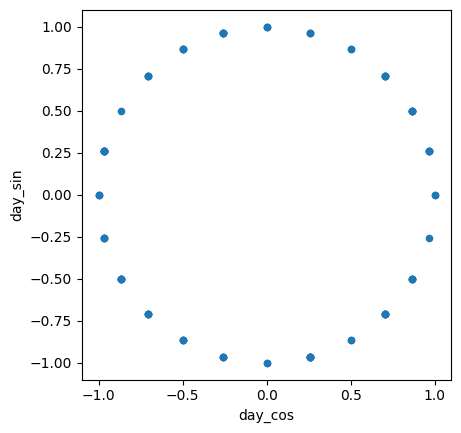

In [40]:
# 日時を円周上等間隔に並べることが出来た
df.sample(100).plot.scatter('day_cos', 'day_sin').set_aspect('equal')

In [42]:
# train, validation, testを7:2:1で分割
n = len(df)

df_train = df[:int(0.7 * n)]
df_val = df[int(0.7 * n):int(0.9 * n)]
df_test = df[int(0.9 * n):]

In [54]:
scaler = MinMaxScaler()
scaler.fit(df_train) # 訓練データセットのみで適合

df_train[df_train.columns] = scaler.transform(df_train)
df_val[df_val.columns] = scaler.transform(df_val)
df_test[df_test.columns] = scaler.transform(df_test)

/tmp/ipykernel_9678/4046014528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train.columns] = scaler.transform(df_train)
/tmp/ipykernel_9678/4046014528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[df_val.columns] = scaler.transform(df_val)
/tmp/ipykernel_9678/4046014528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [55]:
# ここではgithubのデータを有難く利用させてもらうので保存は行わない
# df_train.to_csv('train.csv')
# df_val.to_csv('val.csv')
# df_test.to_csv('test.csv')